In [1]:
import os
os.getcwd()
os.chdir("D:\python")

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [3]:
# Load the data
df = pd.read_csv("CIPLA.NS (2).csv")

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,654.900024,662.000000,643.250000,656.450012,633.842651,3302191
1,2018-09-14,664.000000,670.000000,659.049988,666.400024,643.450134,1512857
2,2018-09-17,673.000000,673.000000,660.400024,664.900024,642.001709,2220455
3,2018-09-18,665.000000,673.000000,660.599976,663.700012,640.843018,1814726
4,2018-09-19,668.000000,678.450012,645.750000,660.599976,637.849731,3043018
5,2018-09-21,668.000000,671.549988,638.400024,653.200012,630.704590,2276641
6,2018-09-24,662.000000,668.950012,640.799988,645.599976,623.366272,2766326
7,2018-09-25,644.000000,665.799988,643.000000,661.750000,638.960144,2295464
8,2018-09-26,664.450012,675.250000,656.000000,672.799988,649.629578,2131833
9,2018-09-27,675.000000,677.000000,655.950012,659.349976,636.642700,3433359


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2023-09-05,1255.000000,1266.00,1235.099976,1238.949951,1238.949951,2179947
1230,2023-09-06,1246.150024,1267.00,1242.599976,1256.750000,1256.750000,2721714
1231,2023-09-07,1259.000000,1261.00,1245.000000,1249.300049,1249.300049,849621
1232,2023-09-08,1249.500000,1262.00,1239.000000,1244.599976,1244.599976,787710
1233,2023-09-11,1244.599976,1252.75,1236.500000,1247.349976,1247.349976,1161994


In [6]:
df.shape

(1234, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,790.900081,800.102958,780.694044,789.868112,772.089177,3.574190e+06
std,225.372391,227.071364,223.828369,225.445490,225.124299,3.948204e+06
min,370.000000,390.750000,355.299988,374.700012,364.840363,0.000000e+00
25%,555.425018,560.824997,549.250015,555.399979,536.272689,1.485725e+06
50%,839.750000,852.125000,829.625000,841.300018,819.162506,2.238628e+06
75%,960.000000,969.962494,950.799988,959.925003,939.382003,4.178376e+06
max,1270.000000,1277.900024,1252.250000,1266.449951,1266.449951,5.689521e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1234 non-null   float64
 2   High       1234 non-null   float64
 3   Low        1234 non-null   float64
 4   Close      1234 non-null   float64
 5   Adj Close  1234 non-null   float64
 6   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


In [9]:
# check for non-null values
df.count()

Date         1234
Open         1234
High         1234
Low          1234
Close        1234
Adj Close    1234
Volume       1234
dtype: int64

In [10]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
#Check for required columns
df = df[['Date','Open','Close']] 

# converting object dtype of date column to datetime dtype

df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) 

In [12]:
df.set_index('Date',drop=True,inplace=True) 
df.head(10)

,Open,Close
Date,,
2018-09-12,654.900024,656.450012
2018-09-14,664.000000,666.400024
2018-09-17,673.000000,664.900024
2018-09-18,665.000000,663.700012
2018-09-19,668.000000,660.599976
2018-09-21,668.000000,653.200012
2018-09-24,662.000000,645.599976
2018-09-25,644.000000,661.750000
2018-09-26,664.450012,672.799988


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>]], dtype=object)

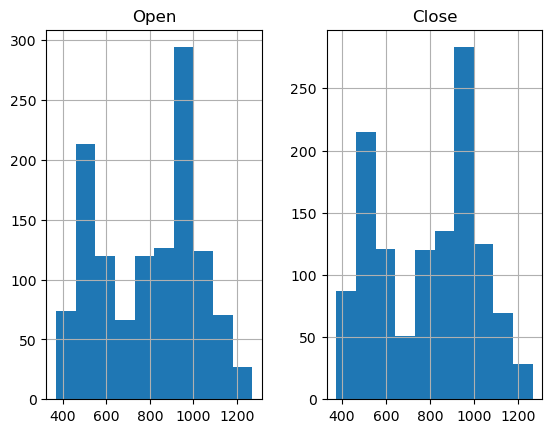

In [13]:
df.hist()

C:\Users\SOUMOJIT CHATTERJEE\AppData\Local\Temp\ipykernel_16080\1299393384.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


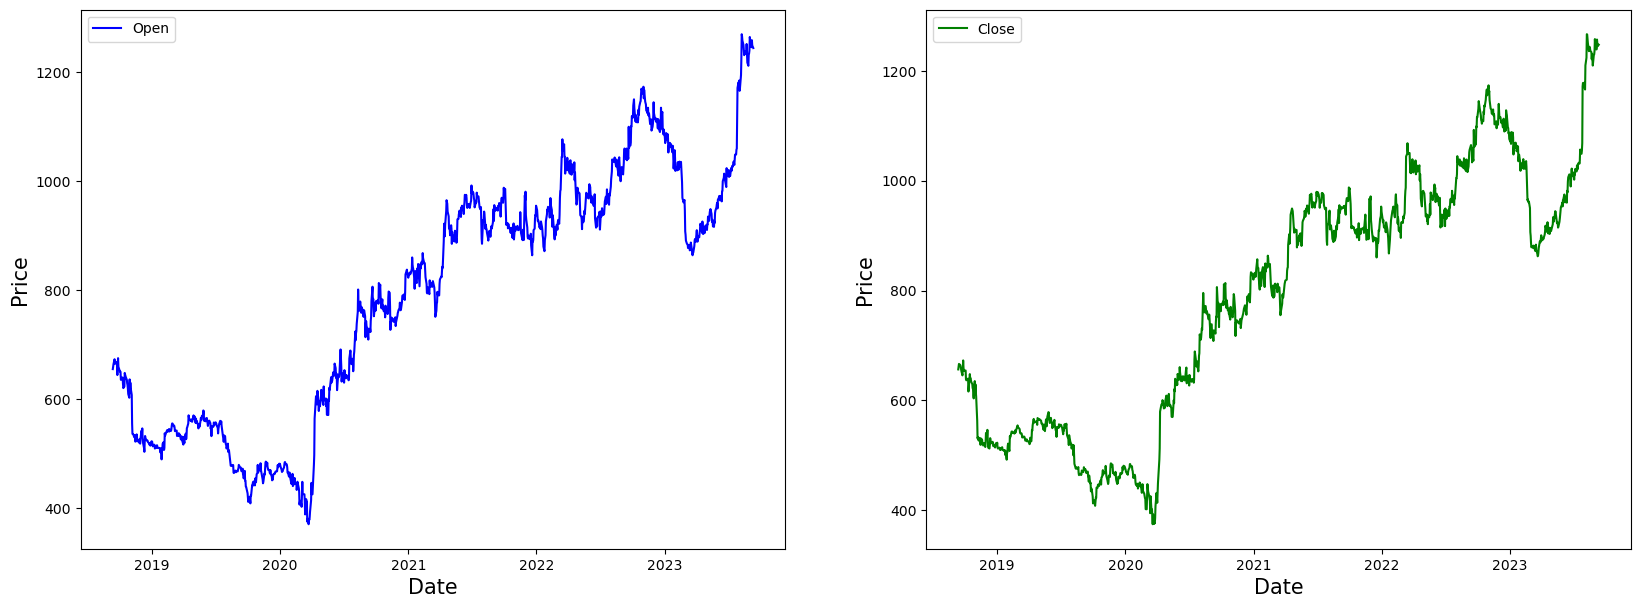

In [14]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fig.show()

In [15]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2018-09-12,0.316556,0.315952
2018-09-14,0.326667,0.327110
2018-09-17,0.336667,0.325428
2018-09-18,0.327778,0.324082
2018-09-19,0.331111,0.320606
2018-09-21,0.331111,0.312307
2018-09-24,0.324444,0.303785
2018-09-25,0.304444,0.321895
2018-09-26,0.327167,0.334287


In [16]:
df.tail(10)

,Open,Close
Date,,
2023-08-29,0.957778,0.958845
2023-08-30,0.960778,0.966022
2023-08-31,0.966833,0.990076
2023-09-01,0.994333,0.976395
2023-09-04,0.978111,0.969050
2023-09-05,0.983333,0.969162
2023-09-06,0.973500,0.989123
2023-09-07,0.987778,0.980768
2023-09-08,0.977222,0.975498


In [17]:
training_size = round(len(df) * 0.75)

In [18]:
training_size

926

In [19]:
train_data = df[:training_size]
test_data  = df[training_size:]
train_data.shape, test_data.shape

((926, 2), (308, 2))

In [20]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [21]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((876, 50, 2), (876, 2), (258, 50, 2), (258, 2))

In [22]:
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=25))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 8s 100ms/step - loss: 0.0521 - mean_absolute_error: 0.1607 - val_loss: 0.0229 - val_mean_absolute_error: 0.1347
Epoch 2/100
28/28 [==============================] - 1s 45ms/step - loss: 0.0034 - mean_absolute_error: 0.0470 - val_loss: 0.0062 - val_mean_absolute_error: 0.0620
Epoch 3/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0016 - mean_absolute_error: 0.0298 - val_loss: 0.0050 - val_mean_absolute_error: 0.0548
Epoch 4/100
28/28 [==============================] - 1s 41ms/step - loss: 0.0014 - mean_absolute_error: 0.0272 - val_loss: 0.0042 - val_mean_absolute_error: 0.0476
Epoch 5/100
28/28 [==============================] - 1s 46ms/step - loss: 0.0014 - mean_absolute_error: 0.0269 - val_loss: 0.0044 - val_mean_absolute_error: 0.0493
Epoch 6/100
28/28 [==============================] - 1s 41ms/step - loss: 0.0013 - mean_absolute_error: 0.0268 - val_loss: 0.0033 - val_mean_absolute_error: 0.0394
Epoch 7/100
28/

In [25]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 11ms/step


array([[0.7116164 , 0.70974326],
       [0.7009994 , 0.7002534 ],
       [0.70609415, 0.7036819 ],
       [0.7101904 , 0.7069585 ],
       [0.7077688 , 0.7053107 ]], dtype=float32)

In [26]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1010.4548 , 1007.6135 ],
       [1000.8995 ,  999.15094],
       [1005.48474, 1002.20825],
       [1009.1714 , 1005.1301 ],
       [1006.99194, 1003.6608 ]], dtype=float32)

In [31]:
df_subset = df.iloc[-202:].copy().reset_index(drop=True)
df1 = pd.concat([df_subset, pd.DataFrame(test_inverse_predicted, columns=['open_predicted', 'close_predicted'])], axis=1)

In [32]:
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
0,1104.949951,1104.449951,1010.454773,1007.613525
1,1107.449951,1104.099976,1000.899475,999.150940
2,1108.900024,1108.000000,1005.484741,1002.208252
3,1113.550049,1095.349976,1009.171387,1005.130127
4,1093.050049,1105.349976,1006.991943,1003.660828


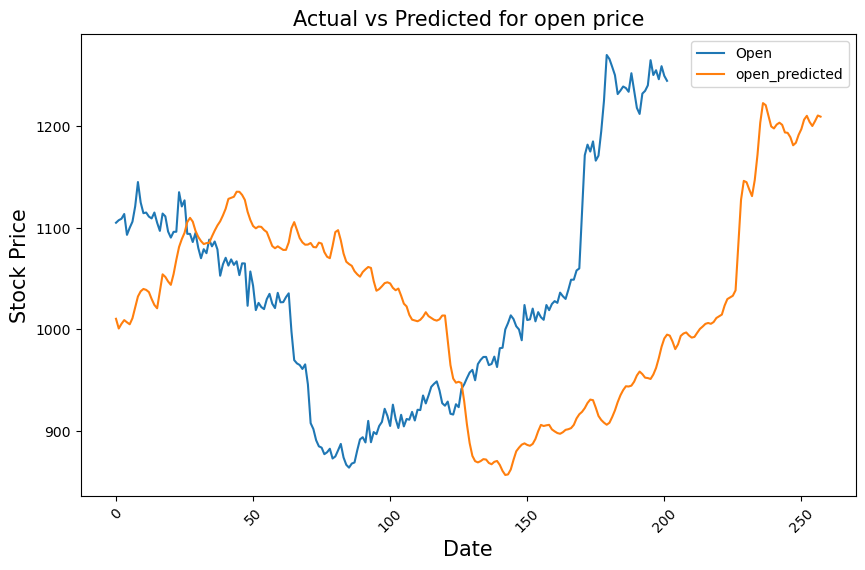

In [33]:
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

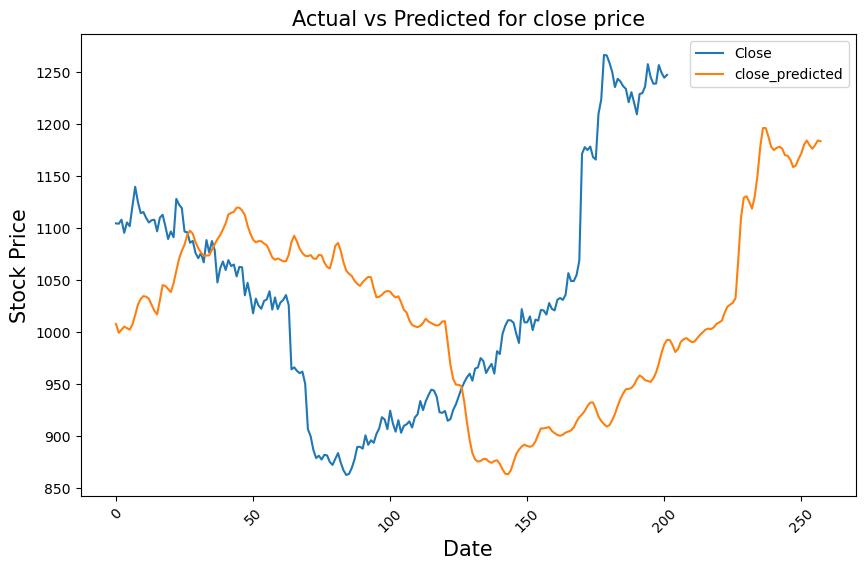

In [34]:
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [35]:
df1

,Open,Close,open_predicted,close_predicted
0,1104.949951,1104.449951,1010.454773,1007.613525
1,1107.449951,1104.099976,1000.899475,999.150940
2,1108.900024,1108.000000,1005.484741,1002.208252
3,1113.550049,1095.349976,1009.171387,1005.130127
4,1093.050049,1105.349976,1006.991943,1003.660828
...,...,...,...,...
253,NaN,NaN,1204.140991,1179.655640
254,NaN,NaN,1200.140869,1176.213501
255,NaN,NaN,1204.961426,1179.758179
256,NaN,NaN,1210.451050,1184.213989


In [37]:
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [39]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 37ms/step


In [40]:
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])

In [17]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


In [18]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [19]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(units=1))


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [21]:
# Train the model
model.fit(train_data, train_data, epochs=100, batch_size=32)


Epoch 1/100
31/31 [==============================] - 4s 7ms/step - loss: 0.1232
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0211
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 3.3175e-04
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 1.1592e-04
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 1.1245e-04
Epoch 8/100
31/31 [==============================] - 0s 7ms/step - loss: 1.0803e-04
Epoch 9/100
31/31 [==============================] - 0s 7ms/step - loss: 1.0313e-04
Epoch 10/100
31/31 [==============================] - 0s 8ms/step - loss: 9.9183e-05
Epoch 11/100
31/31 [==============================] - 0s 8ms/step - loss: 9.4231e-05
Epoch 12/100
31/31 [==============================] - 0s 10ms/step - loss: 9.1068e-05
Epoc

In [22]:
# Evaluate the model
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)


8/8 [==============================] - 1s 3ms/step


In [23]:
# Calculate the mean absolute error
mae = mean_absolute_error(test_data, predictions)


MAE: 1046.0806303882512


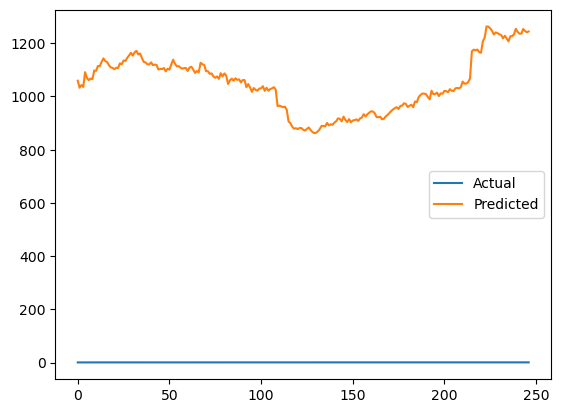

In [24]:
print('MAE:', mae)
# Plot the results
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()